<a href="https://colab.research.google.com/github/LavanyaPanja/Image_Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 998 µs (started: 2021-02-18 07:32:49 +00:00)


In [ ]:
!pip install bing-image-downloader

time: 2.93 s (started: 2021-02-18 07:32:52 +00:00)


In [ ]:
!mkdir images

time: 115 ms (started: 2021-02-18 07:33:02 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir="images",adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 14 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/9a/e0/5c/9ae05cd6d5cfc4ea71fa68b00c203750--sun-flowers-pretty-flowers.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/04/24/3f/04243f00fb840dbb79f197339ea31830.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.ecstasycoffee.com/wp-content/uploads/2016/09/Most-women-opt-for-butterfly-tattoos-because-of-its-cute-shape-and-symbolic-meaning..jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/77/3f/e6/773fe6cd3196fa5240ccad71389f60d3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i2.wp.com/www.ecstasycoffee.com/wp-content/uploads/2016/09/Pretty-sunflower-tattoo-design-with-a-bird-flying-above-it..jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/75/05/38/75053841ad790059e0ba27c83d2ee5d8--field-of-sunflowers-sunflower-fields.jpg
[%] File Do

In [ ]:
from bing_image_downloader import downloader
downloader.download("rugby ball leather",limit=30,output_dir="images",adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://cdn1.bigcommerce.com/server1000/4dd02/images/stencil/1000x1000/products/682/3487/_MG_0368__86038.1332357471.jpg?c=2
[%] File Downloaded !

[%] Downloading Image #2 from http://www.visualdictionaryonline.com/images/sports-games/ball-sports/rugby/rugby-player.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.shopify.com/s/files/1/0226/2169/products/Gold_Pro_2048x2048_V1_1024x1024.jpg?v=1511272163
[%] File Downloaded !

[%] Downloading Image #4 from https://cdn.pixabay.com/photo/2014/04/03/11/08/american-football-311817_640.png
[%] File Downloaded !

[%] Downloading Image #5 from http://www.prodirectrugby.com/productimages/V3_1_Main/72151.jpg
[!] Issue getting: http://www.prodirectrugby.com/productimages/V3_1_Main/72151.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #5 from https://thumbs.dreamstime.com/b/football-ball-soccer-ball-icon-flat-design-vector-foo

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
 
target=[]
images=[]
flat_data=[]
 
DATADIR='/content/images'
CATEGORIES=['pretty sunflower','rugby ball leather']
for categories in CATEGORIES:
    class_num=CATEGORIES.index(categories) 
    path=os.path.join(DATADIR,categories)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img)) 
        img_resized=resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized) 
        target.append(class_num)
 
flat_data=np.array(flat_data) 
target=np.array(target)
images=np.array(images)

time: 29.2 s (started: 2021-02-18 07:34:07 +00:00)


In [ ]:
len(flat_data[0])

67500

time: 4.25 ms (started: 2021-02-18 04:31:43 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 3.48 ms (started: 2021-02-18 04:32:35 +00:00)


<BarContainer object of 2 artists>

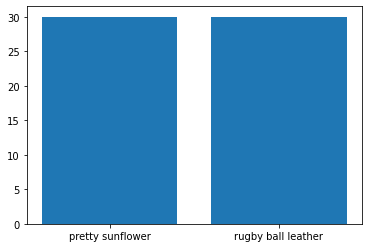

time: 181 ms (started: 2021-02-18 07:37:56 +00:00)


In [ ]:
 
import matplotlib.pyplot as plt
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=100)

time: 16.7 ms (started: 2021-02-18 07:39:53 +00:00)


In [ ]:
 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
             {'C':[1, 10,100,1000], 'kernel':['linear']}, 
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}, 
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 26.9 s (started: 2021-02-18 07:40:02 +00:00)


In [ ]:
y_pred=clf.predict(x_test) 
y_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

time: 45.6 ms (started: 2021-02-18 07:40:35 +00:00)


In [ ]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

time: 5.98 ms (started: 2021-02-18 07:40:45 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

time: 1.26 ms (started: 2021-02-18 07:41:08 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.9444444444444444

time: 8.87 ms (started: 2021-02-18 07:41:14 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[9, 0],
       [1, 8]])

time: 5.47 ms (started: 2021-02-18 07:41:38 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 25.2 ms (started: 2021-02-18 07:41:51 +00:00)


In [ ]:
model=pickle.load(open('img_model.p','rb'))

time: 14.3 ms (started: 2021-02-18 07:41:58 +00:00)


Enter your URLhttps://th.bing.com/th/id/OIP.2KGoEsKihdbja-L8TNgovAHaFj?w=166&h=124&c=7&o=5&dpr=2&pid=1.7
(248, 332, 3)
PREDICTED OUTPUT:pretty sunflower


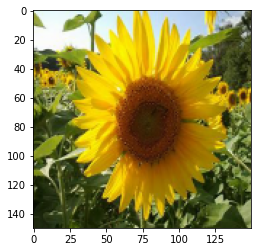

time: 5.78 s (started: 2021-02-18 07:42:23 +00:00)


In [ ]:
flat_data=[]
url=input('Enter your URL')
img=imread(url) 
img_resized=resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape) 
plt.imshow(img_resized)
y_out=model.predict(flat_data) 
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')